In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats

# Load the dataset
file_path = 'AirFare Data.csv'
df = pd.read_csv(file_path)

In [4]:
df.head()

,Unnamed: 0,airline,flight_code,source_city,time_taken,stop,destinate_city,price,Class,Days_Left,dep_time_category,arr_time_category
0,0,SpiceJet,SG-8709,Delhi,130,non-stop,Mumbai,5953,Economy,1,Evening,Night
1,1,SpiceJet,SG-8157,Delhi,140,non-stop,Mumbai,5953,Economy,1,Early Morning,Morning
2,2,AirAsia,I5-764,Delhi,130,non-stop,Mumbai,5956,Economy,1,Early Morning,Early Morning
3,3,Vistara,UK-995,Delhi,135,non-stop,Mumbai,5955,Economy,1,Morning,Afternoon
4,4,Vistara,UK-963,Delhi,140,non-stop,Mumbai,5955,Economy,1,Morning,Morning


In [5]:
# Display summary statistics
print("\nSummary statistics:")
df.describe()


Summary statistics:


,Unnamed: 0,time_taken,price,Days_Left
count,298926.000000,298926.000000,298926.000000,298926.000000
mean,150503.689161,724.486993,20884.235132,26.036661
std,87041.752811,420.109394,22675.125606,13.550043
min,0.000000,50.000000,1105.000000,1.000000
25%,75022.250000,405.000000,4757.000000,15.000000
50%,150526.500000,670.000000,7424.000000,26.000000
75%,226048.750000,960.000000,42521.000000,38.000000
max,301055.000000,1815.000000,98972.000000,49.000000


In [6]:
# Display data types
print("\nData types:")
df.dtypes


Data types:


Unnamed: 0            int64
airline              object
flight_code          object
source_city          object
time_taken            int64
stop                 object
destinate_city       object
price                 int64
Class                object
Days_Left             int64
dep_time_category    object
arr_time_category    object
dtype: object

In [7]:
# Check for missing values
print("\nMissing values:")
df.isnull().sum()


Missing values:


Unnamed: 0           0
airline              0
flight_code          0
source_city          0
time_taken           0
stop                 0
destinate_city       0
price                0
Class                0
Days_Left            0
dep_time_category    0
arr_time_category    0
dtype: int64

In [20]:
mean_price = df['price'].mean()
median_price = df['price'].median()
std_price = df['price'].std()
skew_price = df['price'].skew()
kurt_price = df['price'].kurt()

print("\nMajor Moments:")
print(f"Mean: {mean_price}")
print(f"Median: {median_price}")
print(f"Standard Deviation: {std_price}")
print(f"Skewness: {skew_price}")
print(f"Kurtosis: {kurt_price}")


Major Moments:
Mean: 20884.235131771744
Median: 7424.0
Standard Deviation: 22675.12560601414
Skewness: 1.048259271559863
Kurtosis: -0.45324633746762144


In [10]:
# Relational Graph (Scatter Plot)
def plot_scatter(x, y):
    """
    Create a scatter plot for the given x and y data.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.5)
    plt.xlabel('Days Left')
    plt.ylabel('Price')
    plt.title('Scatter plot of Price vs. Days Left')
    plt.grid(True)
    plt.show()


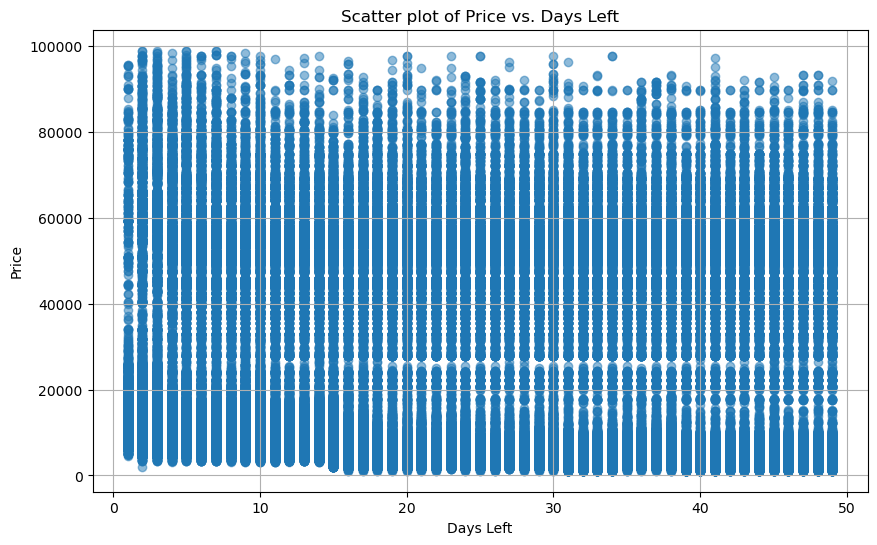

In [11]:
plot_scatter(df['Days_Left'], df['price'])

In [10]:
# Categorical Graph (Bar Chart)
def plot_bar_chart(x, y):
    """
    Create a bar chart for the given x and y data.
    """
    plt.figure(figsize=(12, 6))
    sns.barplot(x=x, y=y)
    plt.xlabel('Airline')
    plt.ylabel('Average Price')
    plt.title('Average Price by Airline')
    plt.xticks(rotation=45)
    plt.show()


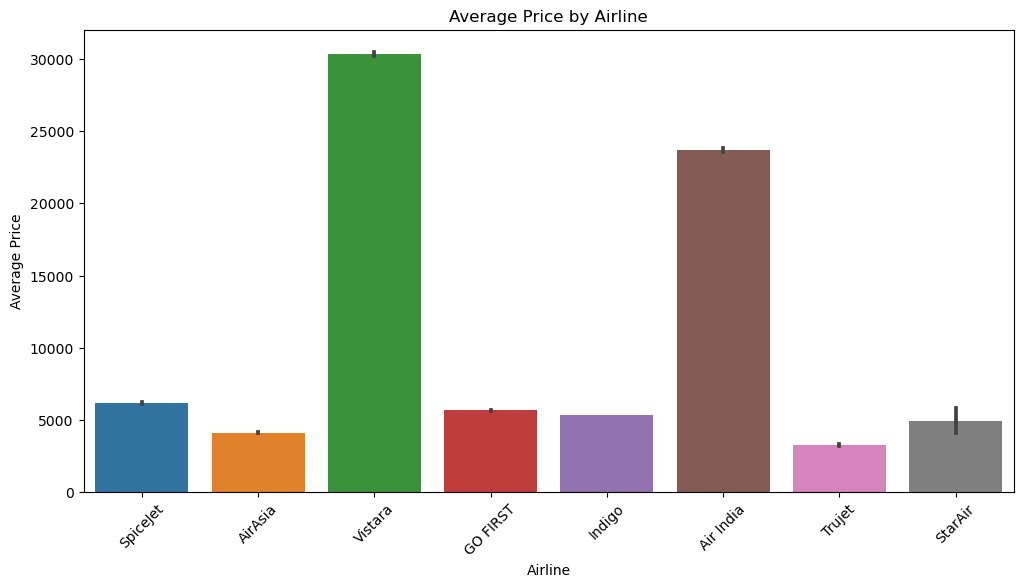

In [11]:
plot_bar_chart(df['airline'], df['price'])

In [12]:
# Statistical Graph (Heatmap)
def plot_heatmap(data):
    """
    Create a heatmap for the correlation matrix of the given data.
    """
    # Exclude non-numeric columns
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Heatmap of Correlation Matrix')
    plt.show()

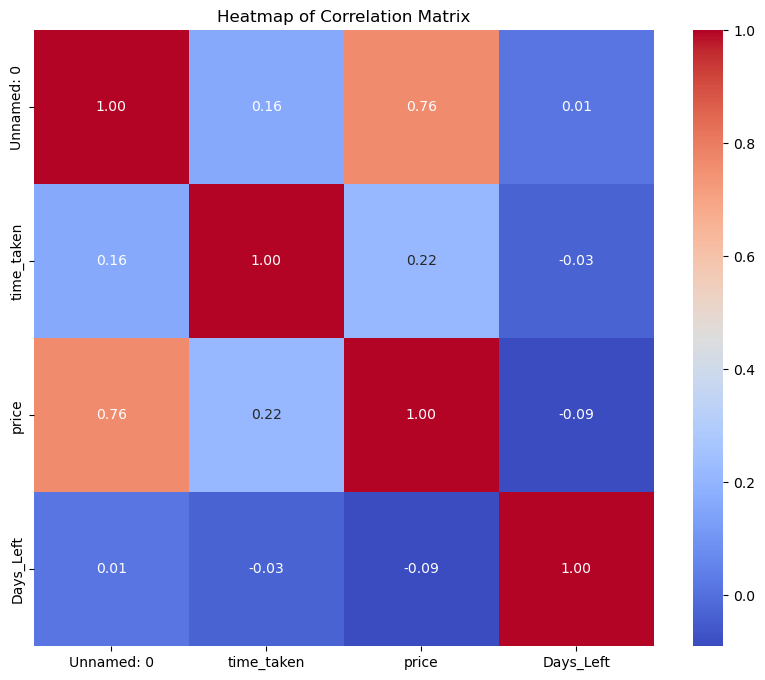

In [13]:
plot_heatmap(df)

In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Preprocessing
numeric_features = ['time_taken', 'price', 'Days_Left']
categorical_features = ['airline', 'source_city', 'stop', 'destinate_city', 'Class', 'dep_time_category', 'arr_time_category']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Apply preprocessing
preprocessed_data = preprocessor.fit_transform(df)

In [18]:
# Elbow/Silhouette Plot for K-means Clustering
def plot_elbow(data):
    """
    Create an elbow plot for k-means clustering.
    """
    distortions = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(K, distortions, 'bo-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method For Optimal k')
    plt.grid(True)
    plt.show()


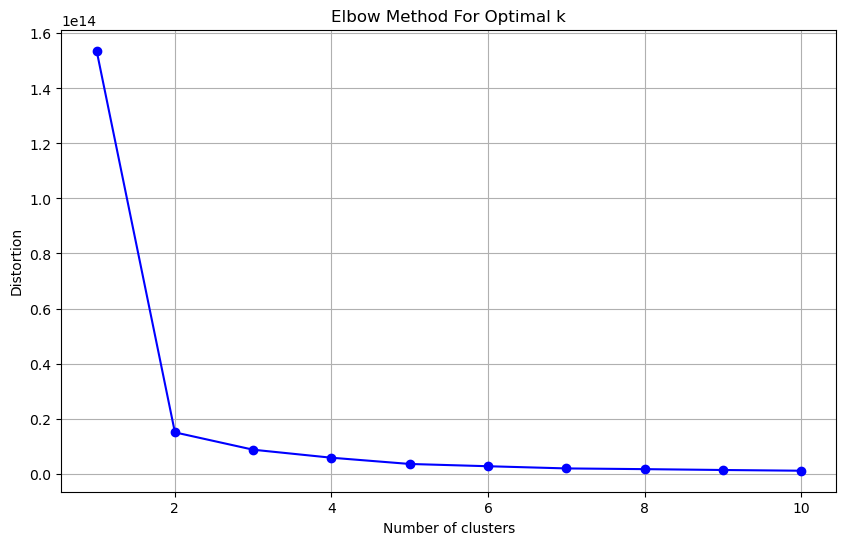

In [19]:
data_for_clustering = df[['Days_Left', 'price']]
plot_elbow(data_for_clustering)

In [21]:
# Clustering Function with Visualization
def perform_kmeans_clustering(data, n_clusters):
    """
    Perform K-means clustering on the given data.
    
    Parameters:
    data (DataFrame): Data to cluster.
    n_clusters (int): Number of clusters.
    
    Returns:
    tuple: Tuple containing clusters and the k-means model.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)
    return clusters, kmeans

In [22]:
clusters, kmeans_model = perform_kmeans_clustering(data_for_clustering, 2)

In [23]:
def plot_clusters(data, clusters, kmeans):
    """
    Plot the clustered data.
    
    Parameters:
    data (DataFrame): Data to plot.
    clusters (array): Cluster labels for the data.
    kmeans (KMeans): Trained KMeans model.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.6)
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])
    plt.title('K-Means Clustering')
    plt.grid(True)
    plt.show()


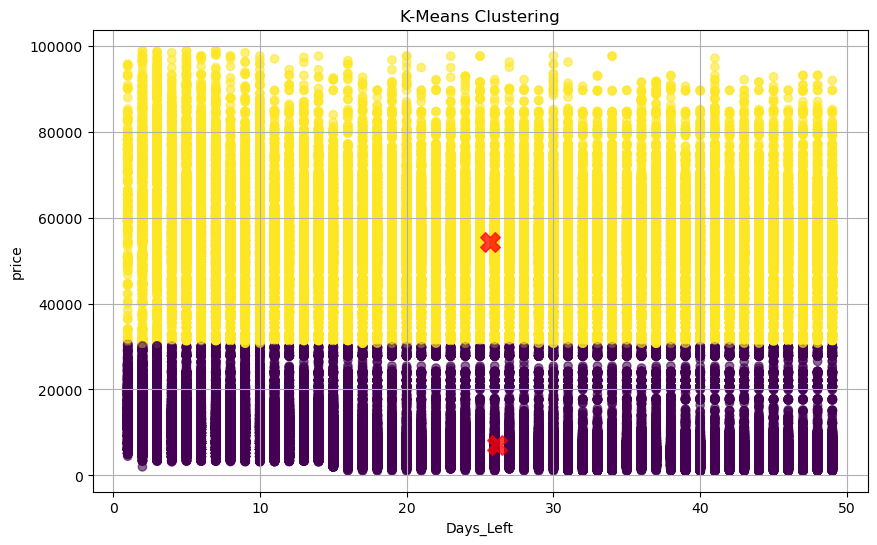

In [24]:
plot_clusters(data_for_clustering, clusters, kmeans_model)

In [27]:
# Fitting Function (Linear Regression)
def perform_linear_regression(x, y):
    """
    Perform linear regression on the given x and y data.
    
    Parameters:
    x (array-like): Input features.
    y (array-like): Target variable.
    
    Returns:
    LinearRegression: Trained linear regression model.
    """
    model = LinearRegression()
    model.fit(x, y)
    return model


In [28]:
x = df['Days_Left'].values.reshape(-1, 1)
y = df['price'].values
linear_model = perform_linear_regression(x, y)
print(f"Linear Model Coefficients: {linear_model.coef_}")
print(f"Linear Model Intercept: {linear_model.intercept_}")

Linear Model Coefficients: [-152.07517277]
Linear Model Intercept: 24843.76488936894


In [31]:
# Predict with uncertainty
def predict_with_uncertainty(model, X, y, confidence=0.95):
    """
    Predict with uncertainty using linear regression.
    """
    preds = model.predict(X)
    residuals = y - preds
    mean_residuals = np.mean(residuals)
    se = np.std(residuals)
    ci = se * 1.96  # Approximate 95% confidence interval
    return preds, mean_residuals, ci


In [32]:
# Visualize predictions with uncertainty
def plot_predictions_with_uncertainty(X, y, preds, ci):
    """
    Plot predictions with uncertainty.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual')
    plt.plot(X, preds, color='red', label='Predicted')
    plt.fill_between(X.flatten(), preds - ci, preds + ci, color='gray', alpha=0.2, label='95% Confidence Interval')
    plt.xlabel('Days Left')
    plt.ylabel('Price')
    plt.title('Linear Regression Predictions with Uncertainty')
    plt.legend()
    plt.grid(True)
    plt.show()


In [34]:
# Predictions with uncertainty
preds, mean_residuals, ci = predict_with_uncertainty(linear_model, x, y)

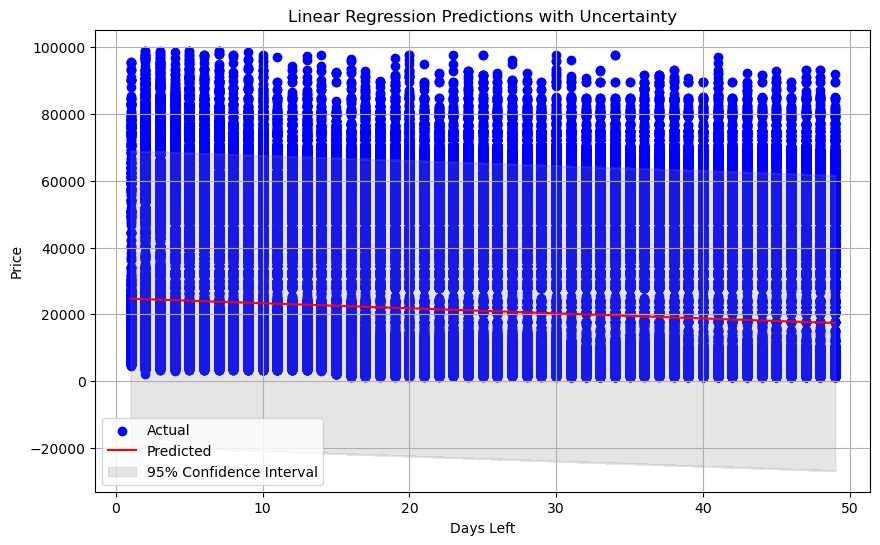

In [36]:
# Visualize predictions with uncertainty
plot_predictions_with_uncertainty(x, y, preds, ci)